In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


sns.set_style("white", {'ytick.major.size': 10.0})
sns.set_context("poster", font_scale=1.1)
matplotlib.rcParams.update({'font.size': 18, 'font.family': 'serif'})

In [2]:
ls ../dat/

benchmark.csv                geaux_modeled_prt_rmsd.json
benchmark.zip                geaux_native_rmsd.json
casf.txt                     geaux_pred_rmsd.json
casf_names.txt               rmsd_box.tiff
geaux_modeled_prt_rmsd.csv   vina_rmsd.json


In [3]:
import json

# Using Experimental Proteins Structures

In [4]:
vina_dat = json.loads(open("../dat/vina_rmsd.json").read())

In [5]:
vina_df = pd.DataFrame(vina_dat).T

In [6]:
vina_df.head()

,native_pocket_vina_rmsd,predicted_pocket_vina_rmsd
10gsA00,7.493246,7.515153
1a30A00,4.340904,4.556522
1bcuH00,2.636271,2.653116
1e66A01,0.925487,5.721366
1f8bA00,1.277627,4.744234


In [7]:
native_pocket_vina_rmsd = pd.DataFrame({"rmsd": vina_df.native_pocket_vina_rmsd,
                                       "Program": "AutoDock Vina",
                                       "Pocket": "Experimental Pocket"})
predicted_pocket_vina_rmsd = pd.DataFrame({"rmsd": vina_df.predicted_pocket_vina_rmsd,
                                          "Program": "AutoDock Vina",
                                          "Pocket": "Predicted Pocket"})

In [8]:
native_pocket_vina_rmsd.head()

,Pocket,Program,rmsd
10gsA00,Experimental Pocket,AutoDock Vina,7.493246
1a30A00,Experimental Pocket,AutoDock Vina,4.340904
1bcuH00,Experimental Pocket,AutoDock Vina,2.636271
1e66A01,Experimental Pocket,AutoDock Vina,0.925487
1f8bA00,Experimental Pocket,AutoDock Vina,1.277627


In [9]:
predicted_pocket_vina_rmsd.head()

,Pocket,Program,rmsd
10gsA00,Predicted Pocket,AutoDock Vina,7.515153
1a30A00,Predicted Pocket,AutoDock Vina,4.556522
1bcuH00,Predicted Pocket,AutoDock Vina,2.653116
1e66A01,Predicted Pocket,AutoDock Vina,5.721366
1f8bA00,Predicted Pocket,AutoDock Vina,4.744234


In [10]:
geaux_native_dat = json.loads(open("../dat/geaux_native_rmsd.json").read())

In [11]:
geaux_native_series = pd.Series(geaux_native_dat)

In [12]:
geaux_pred_dat = json.loads(open("../dat/geaux_pred_rmsd.json").read())
geaux_pred_series = pd.Series(geaux_pred_dat)

In [13]:
geaux_df = pd.DataFrame()

In [14]:
geaux_df['native'] = geaux_native_series

In [15]:
geaux_df['pred'] = geaux_pred_series

In [16]:
geaux_df.head()

,native,pred
10gsA00,0.415111,3.963324
1a30A00,5.448684,7.206883
1bcuH00,2.718535,2.797782
1e66A01,6.056569,7.057048
1f8bA00,0.159644,0.122874


In [17]:
native_pocket_geaux_rmsd = pd.DataFrame({"rmsd": geaux_df.native,
                                       "Program": "GeauxDock",
                                       "Pocket": "Experimental Pocket"})
predicted_pocket_geaux_rmsd = pd.DataFrame({"rmsd": geaux_df.pred,
                                          "Program": "GeauxDock",
                                          "Pocket": "Predicted Pocket"})

In [18]:
native_pocket_geaux_rmsd.head()

,Pocket,Program,rmsd
10gsA00,Experimental Pocket,GeauxDock,0.415111
1a30A00,Experimental Pocket,GeauxDock,5.448684
1bcuH00,Experimental Pocket,GeauxDock,2.718535
1e66A01,Experimental Pocket,GeauxDock,6.056569
1f8bA00,Experimental Pocket,GeauxDock,0.159644


In [19]:
predicted_pocket_geaux_rmsd.head()

,Pocket,Program,rmsd
10gsA00,Predicted Pocket,GeauxDock,3.963324
1a30A00,Predicted Pocket,GeauxDock,7.206883
1bcuH00,Predicted Pocket,GeauxDock,2.797782
1e66A01,Predicted Pocket,GeauxDock,7.057048
1f8bA00,Predicted Pocket,GeauxDock,0.122874


In [20]:
hued_df = pd.concat([native_pocket_geaux_rmsd, native_pocket_vina_rmsd,
                    predicted_pocket_geaux_rmsd, predicted_pocket_vina_rmsd],
                   axis=0)

In [21]:
hued_df.shape

(760, 3)

In [22]:
hued_df.head()

,Pocket,Program,rmsd
10gsA00,Experimental Pocket,GeauxDock,0.415111
1a30A00,Experimental Pocket,GeauxDock,5.448684
1bcuH00,Experimental Pocket,GeauxDock,2.718535
1e66A01,Experimental Pocket,GeauxDock,6.056569
1f8bA00,Experimental Pocket,GeauxDock,0.159644


In [23]:
df = pd.concat([geaux_df, vina_df], axis=1)
df.columns = ['GeauxDock(Native)', 'GeauxDock(Pred)', 
              'Vina(Native)', 'Vina(Pred)']

In [24]:
df.describe()

,GeauxDock(Native),GeauxDock(Pred),Vina(Native),Vina(Pred)
count,185.000000,184.000000,185.000000,185.000000
mean,3.161133,5.090937,2.928834,4.288701
std,2.755584,2.997043,2.542183,2.811065
min,0.070686,0.114197,0.270436,0.169694
25%,0.806296,2.770624,0.947880,2.034707
50%,2.718535,4.924963,1.977336,4.024962
75%,4.869439,7.123298,4.425672,6.380297
max,15.337425,13.025151,13.167786,13.961276


In [25]:
df.to_csv("../dat/benchmark.csv")

In [26]:
df.head()

,GeauxDock(Native),GeauxDock(Pred),Vina(Native),Vina(Pred)
10gsA00,0.415111,3.963324,7.493246,7.515153
1a30A00,5.448684,7.206883,4.340904,4.556522
1bcuH00,2.718535,2.797782,2.636271,2.653116
1e66A01,6.056569,7.057048,0.925487,5.721366
1f8bA00,0.159644,0.122874,1.277627,4.744234


In [27]:
df['complex'] = df.index.values

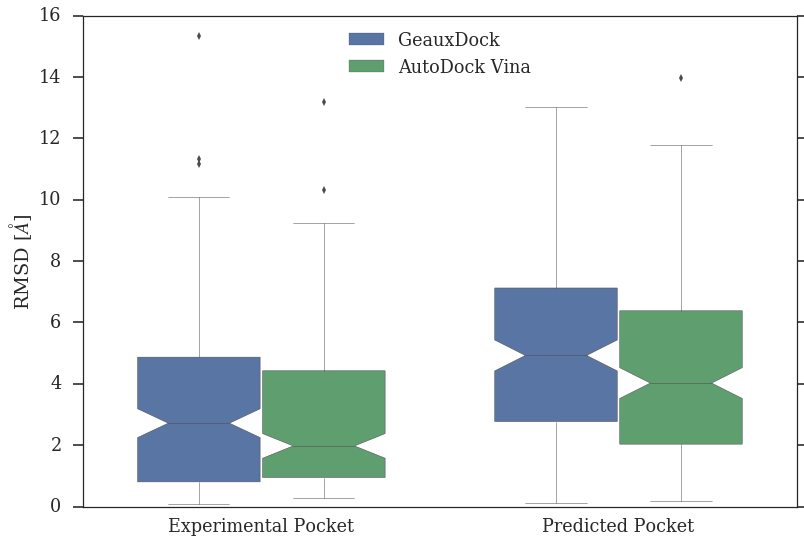

In [28]:
plt.figure()
ax = sns.boxplot(data=hued_df, hue="Program", x='Pocket', y='rmsd', 
                 notch=True, linewidth=0.5, width=0.7)
ax.legend(loc='upper center')
plt.xlabel("")
plt.ylabel("RMSD [$\AA$]")
plt.savefig("../dat/rmsd_box.tiff", dpi=300)

# Using Modeled Protein Structures

In [29]:
modeled_result_ifn = "../dat/geaux_modeled_prt_rmsd.json"

In [30]:
with open(modeled_result_ifn, 'r') as ifs:
    data = json.loads(ifs.read())

In [31]:
df = pd.DataFrame(data).T

In [32]:
df.head()

,geaux_0.5,geaux_0.7,vina_0.5,vina_0.7
10gsA00,20.3752,20.318,18.8528,20.931
1a30A00,7.35769,7.36673,8.26353,8.39223
1bcuH00,2.31574,2.37372,4.7447,4.77876
1e66A01,4.31504,5.62214,6.05278,4.5176
1f8bA00,0.154302,0.159532,4.58574,4.4227


In [33]:
df['geaux_0.5'].median()

4.746856079486173

In [34]:
df['geaux_0.7'].median()

4.7554402681560415

In [35]:
df['vina_0.5'].median()

6.043412963645158

In [36]:
df['vina_0.7'].median()

6.328080199431766

In [37]:
df.to_csv("../dat/geaux_modeled_prt_rmsd.csv")

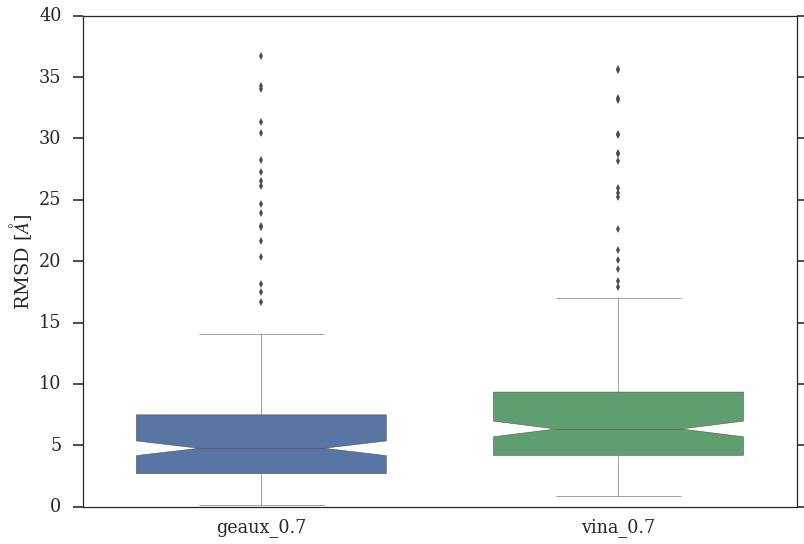

In [38]:
plt.figure()
ax = sns.boxplot(data=df[['geaux_0.7', 'vina_0.7']],
                 notch=True, linewidth=0.5, width=0.7)
#ax.legend(loc='upper center')
#plt.xlabel("")
plt.ylabel("RMSD [$\AA$]")
#plt.savefig("../dat/rmsd_box.tiff", dpi=300)

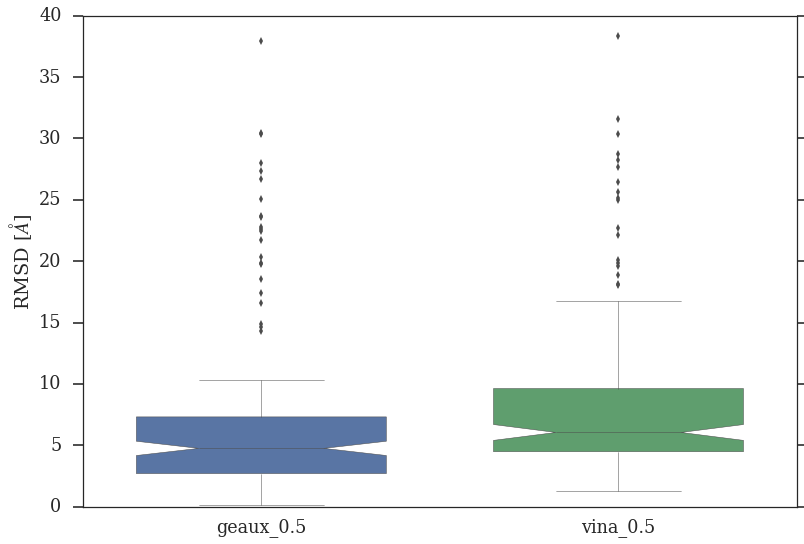

In [39]:
plt.figure()
ax = sns.boxplot(data=df[['geaux_0.5', 'vina_0.5']],
                 notch=True, linewidth=0.5, width=0.7)
#ax.legend(loc='upper center')
#plt.xlabel("")
plt.ylabel("RMSD [$\AA$]")
#plt.savefig("../dat/rmsd_box.tiff", dpi=300)

# Combined

In [40]:
model_df = df[['geaux_0.7', 'vina_0.7']].dropna()

In [41]:
model_df.index.shape

(159,)

In [42]:
exp_df = hued_df[hued_df['Pocket'] == 'Experimental Pocket']
exp_df = exp_df[exp_df.index.isin(model_df.index)]
exp_df.columns = ['Pocket', 'Program', 'rmsd']
exp_df['Pocket'] = ['Self-Docking'] * len(exp_df)

In [43]:
exp_df.shape

(317, 3)

In [44]:
model_df.head()

,geaux_0.7,vina_0.7
10gsA00,20.318,20.931
1a30A00,7.36673,8.39223
1bcuH00,2.37372,4.77876
1e66A01,5.62214,4.5176
1f8bA00,0.159532,4.4227


In [45]:
geaux_df = pd.DataFrame({"rmsd": model_df['geaux_0.7'],
                        "Pocket": 'Model-Docking',
                        "Program": 'GeauxDock'})
vina_df = pd.DataFrame({"rmsd": model_df['vina_0.7'],
                       "Pocket": 'Model-Docking',
                       "Program": 'AutoDock Vina'})

In [46]:
final_hued_df = pd.concat([exp_df, geaux_df, vina_df], axis=0)

In [47]:
final_hued_df.head()

,Pocket,Program,rmsd
10gsA00,Self-Docking,GeauxDock,0.415111
1a30A00,Self-Docking,GeauxDock,5.44868
1bcuH00,Self-Docking,GeauxDock,2.71853
1e66A01,Self-Docking,GeauxDock,6.05657
1f8bA00,Self-Docking,GeauxDock,0.159644


In [48]:
final_hued_df.shape

(635, 3)

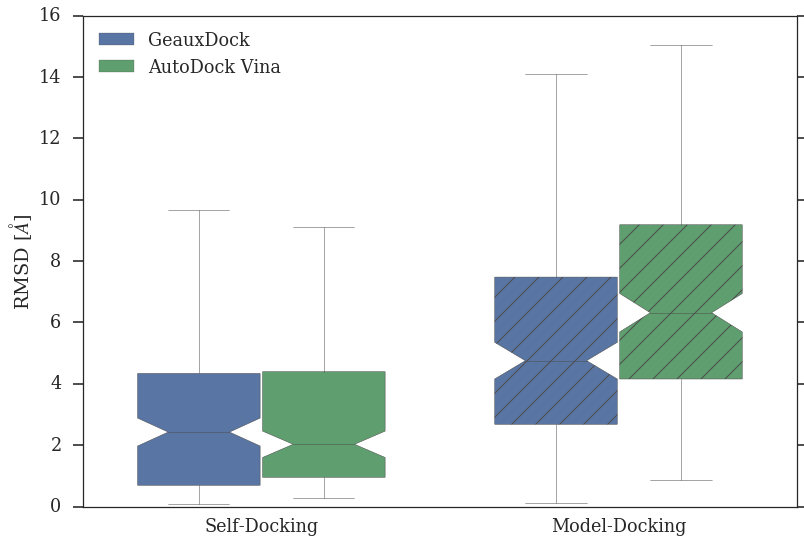

In [49]:
plt.figure()
ax = sns.boxplot(data=final_hued_df, hue="Program", x='Pocket', y='rmsd', 
                 showfliers=False,
                 notch=True, linewidth=0.5, width=0.7)

box = ax.artists[0]
box.set_hatch('0')
box = ax.artists[1]
box.set_hatch('0')

box = ax.artists[2]
box.set_hatch('/')
box = ax.artists[3]
box.set_hatch('/')

ax.legend(loc='upper left')
plt.xlabel("")
plt.ylabel("RMSD [$\AA$]")
plt.savefig("../dat/rmsd_box.tiff", dpi=300)